# Business Understanding

The company would like to create a new movie studio for original video content, but we don't have any experience with making movies.  Here, we want to explore what types of films are performing best at the box office currently in order to make recommendations about what type of films to create in our new studio.

# Data Understanding

We are working with two datasets provided by IMDB and The Numbers.  The data includes information about movies and their genres, ratings, staff, domestic and international gross revenue, budget, and more.

## Data Preparation

Here I will examine my two data sources and extract information about genres, writers, and release date.  I will calculate ROI as a measure for movie success, and combine these to make the data easier to work with.

In [1]:
#importing necessary libraries to get a look at my two data sources, and connecting to the SQL database

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect('data/im.db')

In [2]:
#seeing what the tables are in the IMDB database

IMDB = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
IMDB

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
#getting a look at all columns to get a feel for the data and format

pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
#extracting genre and writer values into a dataframe together with their corresponding movies

query = '''
SELECT
    mb.*,
    p.primary_name AS writer_name
FROM
    movie_basics AS mb
JOIN
    writers AS w ON mb.movie_id = w.movie_id
JOIN
    persons AS p ON w.person_id = p.person_id;
'''

IMDB_df = pd.read_sql(query, conn)
IMDB_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,writer_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Mahasweta Devi
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Anjana Rawail
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
...,...,...,...,...,...,...,...
255866,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
255867,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo
255868,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo
255869,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Angela Gurgel


In [5]:
#I have all the info I want from the SQL database, so now I disconnect.

conn.close()

In [6]:
#Reading in The Numbers CSV

TN = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [7]:
#Getting a feel for the type and amount information contained in this CSV

TN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
#Checking out how the data looks, its format etc.

TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
#removing the dollar signs and commas from monetary values

columns_without_symbols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in columns_without_symbols:
    TN[col] = TN[col].str.replace('$', '', regex=False)
    TN[col] = TN[col].str.replace(',', '', regex=False)

In [10]:
#confirming the symbols were removed

TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [11]:
#converting monetary values to integers so that I can perform mathematical operations

converted_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in converted_columns:
    TN[col] = pd.to_numeric(TN[col], errors='coerce')

In [12]:
#calculating profit and adding the value as a column so I can use to calculate ROI

TN['profit'] = (TN['domestic_gross'] + TN['worldwide_gross']) - TN['production_budget']
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


In [13]:
#calculating ROI and multiplying by 100 as we report ROI as a percentage

TN['ROI'] = (TN['profit'] / TN['production_budget']) * 100
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,732.200683
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,511.010451


In [14]:
#converting release_date to datetime so that I can extract the month by itself

TN['release_date'] = pd.to_datetime(TN['release_date'])
TN['release_month'] = TN['release_date'].dt.strftime('%b')
TN

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943,Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,511.010451,Dec
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec
5778,79,1999-04-02,Following,6000,48482,240495,282977,4716.283333,Apr
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-2324,-46.480000,Jul
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep


# Exploratory Data Analysis

Here I will explore the relationship of several variables to ROI: release month, genre, and writer.  I will generate visualizations to communicate correlation.  They reveal that summer releases of mystery, horror or thriller films perform best and the writers we should persue working with are Chris Lofing, Travis Cluff, and Matthew Peterman.

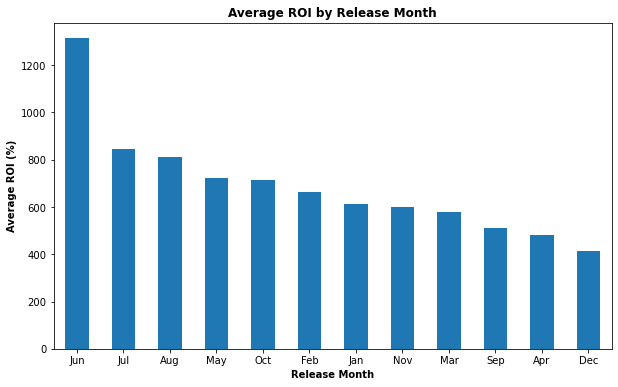

In [15]:
#plotting correlation of release_month against ROI


ROI_by_month = TN.groupby('release_month')['ROI'].mean()
ROI_by_month = ROI_by_month.sort_values(ascending=False)

ROI_by_month.plot(kind='bar', figsize=(10,6))

plt.title('Average ROI by Release Month', fontweight='bold')
plt.xlabel('Release Month', fontweight='bold')
plt.ylabel('Average ROI (%)', fontweight='bold')
plt.xticks(rotation=0)
plt.show
plt.savefig('roi_by_month.jpeg', facecolor='white')

In [16]:
#I'm going to combine my IMDB data with the TN financial data now so that I can evaluate whether my other two variables correlate with ROI.

df = pd.merge(TN,
             IMDB_df[['primary_title', 'genres', 'writer_name']],
left_on='movie',
right_on='primary_title',
how='inner')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,primary_title,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Avatar,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Avatar,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Stuart Beattie
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Ted Elliott
4,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Tim Powers
...,...,...,...,...,...,...,...,...,...,...,...,...
8522,73,2012-01-13,Newlyweds,9000,4584,4584,168,1.866667,Jan,Newlyweds,"Comedy,Drama",Edward Burns
8523,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,Red 11,"Horror,Sci-Fi,Thriller",Robert Rodriguez
8524,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,Red 11,"Horror,Sci-Fi,Thriller",Racer Rodriguez
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,A Plague So Pleasant,"Drama,Horror,Thriller",Benjamin Roberds


In [17]:
#removing the primary_title column which is now redundant

df = df.drop('primary_title', axis=1)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,"Action,Adventure,Fantasy",Stuart Beattie
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,"Action,Adventure,Fantasy",Ted Elliott
4,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,"Action,Adventure,Fantasy",Tim Powers
...,...,...,...,...,...,...,...,...,...,...,...
8522,73,2012-01-13,Newlyweds,9000,4584,4584,168,1.866667,Jan,"Comedy,Drama",Edward Burns
8523,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,"Horror,Sci-Fi,Thriller",Robert Rodriguez
8524,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,"Horror,Sci-Fi,Thriller",Racer Rodriguez
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,"Drama,Horror,Thriller",Benjamin Roberds


In [18]:
#The genres column is messy with multiple values, so I'll separate them out to make them easier to work with

df_exploded = df.assign(genres=df['genres'].str.split(',')).explode('genres')
ROI_by_genre = df_exploded.groupby('genres')['ROI'].mean().sort_values(ascending=False)
df_exploded

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Action,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Adventure,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Fantasy,Stuart Beattie
...,...,...,...,...,...,...,...,...,...,...,...
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Thriller,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Drama,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds


In [19]:
#I'm going to use data back to 1995 to keep my recommendations modern and relevant since some of these movies are from the 1930s-40s

cutoff_date = pd.to_datetime('1995-01-01')
df_modern = df_exploded[df_exploded['release_date'] >= cutoff_date]
df_modern

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Action,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Adventure,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Fantasy,Stuart Beattie
...,...,...,...,...,...,...,...,...,...,...,...
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Thriller,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Drama,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds


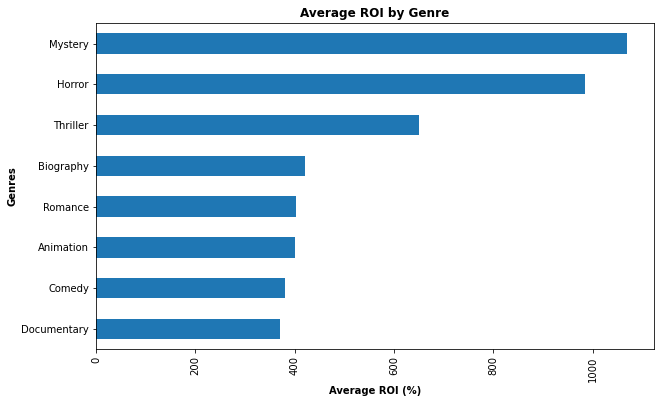

In [20]:
#plotting relationship between average ROI and genre, plotting only the top 8

ROI_by_genre = df_modern.groupby('genres')['ROI'].mean().nlargest(8)
ROI_by_genre = ROI_by_genre.sort_values(ascending=True)

ROI_by_genre.plot(kind='barh', figsize=(10,6))
plt.title('Average ROI by Genre', fontweight='bold')
plt.xlabel('Average ROI (%)', fontweight='bold')
plt.ylabel('Genres', fontweight='bold')
plt.xticks(rotation=90)
plt.show
plt.savefig('ROI_by_genre.jpeg', facecolor='white', edgecolor='none')

In [21]:
#I want to recommend some specific writers for the top genres, so I'll remove records relating to all the other genres.

best_genres = ['Horror', 'Mystery', 'Thriller']
df_filtered = df_modern[df_modern['genres'].isin(best_genres)]
df_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
52,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098,259.898366,Nov,Thriller,Ian Fleming
53,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098,259.898366,Nov,Thriller,Jez Butterworth
54,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098,259.898366,Nov,Thriller,John Logan
...,...,...,...,...,...,...,...,...,...,...,...
8524,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,Thriller,Racer Rodriguez
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Thriller,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds


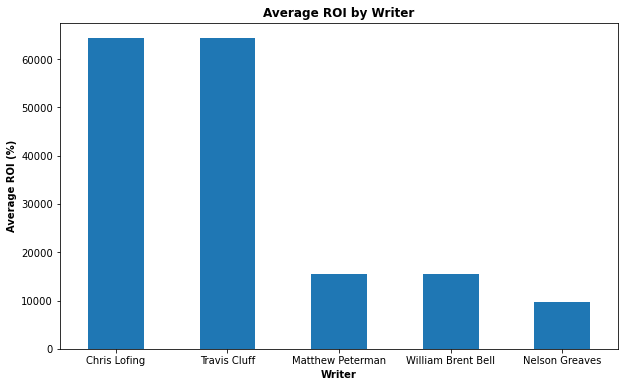

In [22]:
#plotting the relationship between ROI and writer, plotting only the top 5 writers

ROI_by_writer = df_filtered.groupby('writer_name')['ROI'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
ROI_by_writer.plot(kind='bar')
plt.title('Average ROI by Writer', fontweight='bold')
plt.xlabel('Writer', fontweight='bold')
plt.ylabel('Average ROI (%)', fontweight='bold')
plt.xticks(rotation=360)
plt.show
plt.savefig('ROI_by_writer.jpeg', facecolor='white')

# Conclusions

1) Release dates in the summer, ideally early summer (June), are correlated with the best ROI.

2) Horror, mystery, and thriller genres are associated with the highest ROI.

3) Chris Lofing, Travis Cluff, and Matthew Peterman are writers associated with the highest ROI movies in the horror, mystery, and thriller genres.

## Limitations

Even though we have a good amount of data covering a long time period, the rise of streaming movies is still a new development that will continue to change the way consumers watch movies and even what they watch.  There are also societal changes that could cause preferences to evolve over time.  We also had no information about marketing budget in this data, so that should be evaluated as well.

## Recommendations

1) We should work toward a goal of summer release dates, ideally in June.

2) Horror, mystery, and thriller genres are recommended.

3) Chris Lofing, Travis Cluff, and Matthew Peterman are writers we should try to work with.

## Next Steps

1) This is an ever-evolving industry, so keeping tabs on this data and how it changes is essential.

2) It would be good to get some information about marketing budgets and to what extent marketing could help achieve an even better ROI for our movies.